# Exploring the Power of Vertex AI Gemini

Copyright 2024, Denis Rothman

Release date: Juin 1,2024

October 28, 2024. Timer added for Google Vertex AI rate usage.

**Important Note:**

* **Check Costs and Quotas:** Before running this notebook, be sure to review the cost of using the Vertex AI API and your project's quotas to avoid unexpected expenses.
* **Google Cloud Project:**  Ensure you have a Google Cloud project with the Vertex AI API enabled. You'll need to replace `"aiex-57523"` and `"us-central1"` in the code with your actual project ID and region.

**Introduction**

Google, like other tech giants, is rapidly advancing in the field of Large Language Models (LLMs) and generative AI.  The **Gemini** family of models is a testament to Google's commitment to pushing the boundaries of what AI can achieve.

This Colab notebook showcases the impressive capabilities of the Gemini model across a wide range of tasks:

* **Natural Language Processing (NLP):**  Gemini tackles complex questions in science, philosophy, history, law, economics, and more. It can even write creative stories and analyze literature.
* **Technical Challenges:**  Gemini demonstrates proficiency in code generation, technical problem-solving, and medical diagnosis.
* **Social and Cultural Insights:**  The model delves into social commentary, environmental analysis, linguistics, and even art interpretation.
* **Computer Vision:** We'll leverage Gemini's understanding of images to analyze a famous painting by Salvador Dalí.

**Model Versions**

Google is continuously updating and improving its models.  It's important to be aware of the specific model version you're using. If you encounter any issues, refer to Google's [Model Versioning documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/model-versioning) for guidance.

**Bigframes Note**

A recent update to the BigFrames library (1.0.1) might conflict with the Vertex AI SDK. For this notebook, we'll use an earlier version (`bigframes==0.26.0`). If you have issues, try restarting your Colab session after installing this version.



In [1]:
!pip install google-cloud-aiplatform

In [2]:
from google.colab import auth as google_auth
google_auth.authenticate_user()

**Notebook Update**

There's a recent major release in the [BigFrames library](https://pypi.org/project/bigframes/#history) which is now 1.0.1, which might conflict with the Vertex AI SDK used here.

BigQuery DataFrames provides a Pythonic DataFrame and machine learning (ML) API powered by the BigQuery engine.

Let's install a <1.0.0


In [3]:
!pip install bigframes==0.26.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.3/457.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.5/356.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.9 MB/s eta 0:00:00
  Attempting uninstall: sqlglot
    Found existing installation: sqlglot 25.1.0
    Uninstalling sqlglot-25.1.0:
      Successfully uninstalled sqlglot-25.1.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ibis-framework
    Found existing

restart session before continuing if necessary

In [4]:
import vertexai

In [5]:
import textwrap

# Calling Gemini and processing the response

In [6]:
import base64
import vertexai
from vertexai.generative_models import GenerativeModel
import vertexai.preview.generative_models as generative_models
from IPython.display import HTML

def generate_response(text1):
    vertexai.init(project="aiex-57523", location="us-central1")  # Update with your project and location
    model = GenerativeModel("gemini-1.5-flash-001")

    generation_config = {
        "max_output_tokens": 8192,
        "temperature": 1,
        "top_p": 0.95,
    }

    safety_settings = {
        generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
        generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
        generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
        generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    }

    response = model.generate_content(
        [text1],
        generation_config=generation_config,
        safety_settings=safety_settings,
    )

    return response.text  # Directly access the text from the response object

HTML display

In [7]:
import markdown
from IPython.display import HTML

def display_html(response_text):
    # Convert Markdown to HTML
    html_content = markdown.markdown(response_text)

    # Wrap the HTML content in a basic structure
    full_html = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Gemini Response</title>
        <style>
            body {{ font-family: sans-serif; }}
            .response-container {{ background-color: #f0f0f0; padding: 20px; border-radius: 5px; }}
        </style>
    </head>
    <body>
        <h1>Gemini Response</h1>
        <div class="response-container">{html_content}</div>
    </body>
    </html>
    """

    return HTML(full_html)  # Return the HTML object

# LLM Tasks

## Question 1: Scientific Analysis & Reasoning

In [8]:
# Question 1: Scientific Analysis & Reasoning
text1 = """Analyze the implications of the recent discovery of a potentially habitable exoplanet within the TRAPPIST-1 system. Consider its distance from its star, potential atmospheric composition, and the likelihood of it harboring liquid water. Discuss the significance of this finding for the search for extraterrestrial life."""
response1 = generate_response(text1)
display_html(response1)

## Question 2: Philosophical Inquiry

In [9]:
import time
time.sleep(30)

In [10]:
# Question 2: Philosophical Inquiry
text2 = """In the context of existentialism, examine the concept of 'absurdity.' Discuss the relationship between absurdity and the human search for meaning. How do existentialist philosophers like Albert Camus and Jean-Paul Sartre address this paradox?"""
response2 = generate_response(text2)
display_html(response2)

## Question 3: Historical Interpretation & Counterfactual

In [11]:
time.sleep(30)

In [12]:
# Question 3: Historical Interpretation & Counterfactual
text3 = """Assess the impact of the Industrial Revolution on global socio-economic structures. If the Industrial Revolution had not occurred, what might the world look like today in terms of technology, economic systems, and social structures?"""
response3 = generate_response(text3)
display_html(response3)

## Question 4: Creative Writing Prompt

In [13]:
time.sleep(30)

In [14]:
# Question 4: Creative Writing Prompt
text4 = """You find a mysterious antique key hidden within the pages of an old book. The key seems to emanate a strange energy. Write a short story about where the key leads you and the adventure that unfolds."""
response4 = generate_response(text4)
display_html(response4)

## Question 5: Technical Problem Solving

In [15]:
time.sleep(30)

In [16]:
# Question 5: Technical Problem Solving
text5= """A distributed system experiences intermittent failures due to network latency. Describe a comprehensive approach to diagnose the root cause of this issue. Include potential mitigation strategies to improve system reliability."""
response5 = generate_response(text5)
display_html(response5)

## Question 6: Ethical Dilemma

In [17]:
time.sleep(30)

In [18]:
# Question 6: Ethical Dilemma
text6 = """An autonomous vehicle is programmed to prioritize the safety of its occupants. In a scenario where a collision is unavoidable, should the vehicle prioritize the occupants even if it means harming a greater number of pedestrians? Discuss the ethical considerations involved in this decision."""
response6=generate_response(text6)
display_html(response6)

## Question 7: Legal Analysis

In [19]:
time.sleep(30)

In [20]:
# Question 7: Legal Analysis
text7 = """Analyze the legal implications of the increasing use of facial recognition technology for surveillance purposes. Discuss the balance between security concerns and privacy rights. Cite relevant case law and legislation where applicable."""
response7=generate_response(text7)
display_html(response7)

## Question 8: Economic Forecasting

In [21]:
time.sleep(30)

In [22]:
# Question 8: Economic Forecasting
text8 = """Evaluate the potential impact of a global recession on emerging markets. Consider the factors that might make these markets particularly vulnerable and propose strategies for mitigating negative consequences."""
response8=generate_response(text8)
display_html(response8)

## Question 9: Medical Case Study

In [23]:
time.sleep(30)

In [24]:
# Question 9: Medical Case Study
text9 = """A patient presents with a complex set of symptoms including fatigue, muscle weakness, and cognitive impairment. Formulate a differential diagnosis considering potential underlying causes. Outline a diagnostic workup to confirm or rule out each possibility."""
response9=generate_response(text9)
display_html(response9)

## Question 10: Coding Challenge

In [25]:
time.sleep(30)

In [26]:
# Question 10: Coding Challenge
text10 = """Develop a Python function to implement a binary search algorithm. The function should take a sorted list and a target value as input. It should return the index of the target value if found, or -1 if not found. Optimize the function for efficiency."""
response10=generate_response(text10)
display_html(response10)

## Question 11: Social Commentary

In [27]:
time.sleep(30)

In [28]:
# Question 11: Social Commentary
text11 = """Analyze the impact of social media on political discourse in the 21st century. Discuss both the positive and negative aspects, including the potential for misinformation, echo chambers, and the amplification of extremist views."""
response11=generate_response(text11)
display_html(response11)

## Question 12: Environmental Analysis

In [29]:
time.sleep(30)

In [30]:
# Question 12: Environmental Analysis
text12 = """Examine the long-term consequences of rising sea levels on coastal communities and ecosystems. Discuss potential mitigation strategies and the role of international cooperation in addressing this global challenge."""
response12=generate_response(text12)
display_html(response12)

## Question 13: Linguistic Exploration

In [31]:
time.sleep(30)

In [32]:
# Question 13: Linguistic Exploration
text13 = """Compare and contrast the evolution of Romance languages from Latin. Analyze the factors that contributed to their divergence and identify commonalities that persist despite their distinct identities."""
response13=generate_response(text13)
display_html(response13)

## Question 14: Mathematical Problem

In [33]:
time.sleep(30)

In [34]:
# Question 14: Mathematical Problem
text14 = """Describe the Riemann hypothesis and its significance in the field of number theory. Explain the implications if the hypothesis were proven to be true or false."""
response14=generate_response(text14)
display_html(response14)

## Question 15: Psychological Analysis

In [35]:
time.sleep(30)

In [36]:
# Question 15: Psychological Analysis
text15 = """Discuss the concept of cognitive dissonance and its role in shaping human behavior. Provide examples of how individuals resolve dissonance and the potential consequences for decision-making."""
response15=generate_response(text15)
display_html(response15)

## Question 16: Sociological Inquiry

In [37]:
time.sleep(30)

In [38]:
# Question 16: Sociological Inquiry
text16 = """Analyze the phenomenon of social mobility in modern societies. Examine the factors that contribute to upward and downward mobility and the potential impact on social inequality."""
response16=generate_response(text16)
display_html(response16)

## Question 17: Literary Critique

In [39]:
time.sleep(30)

In [40]:
# Question 17: Literary Critique
text17 = """Provide a critical analysis of a novel or play of your choice. Discuss the author's use of literary devices, thematic elements, and the broader cultural context in which the work was created."""
response17=generate_response(text17)
display_html(response17)

## Question 18: Artistic Interpretation

In [41]:
time.sleep(30)

In [42]:
# Question 18: Artistic Interpretation
text18 = """Interpret a famous work of art, such as a painting or sculpture. Analyze the artist's technique, symbolism, and the historical context in which the work was produced."""
response18=generate_response(text18)
display_html(response18)

## # Question 19: Music Analysis

In [43]:
time.sleep(30)

In [44]:
# Question 19: Music Analysis
text19 = """Analyze a piece of music from a specific genre or composer. Discuss the musical elements, historical context, and the emotional impact of the piece."""
response19=generate_response(text19)
display_html(response19)

## Question 20: Film Studies

In [45]:
time.sleep(30)

In [46]:
# Question 20: Film Studies
text20 = """Examine the evolution of film as an art form and cultural phenomenon. Analyze the impact of technological advancements, social trends, and the role of film in reflecting and shaping societal values."""
response20=generate_response(text20)
display_html(response20)

# Computer Vision

We will describe a painting by Salvador Dali:

https://www.wikiart.org/en/salvador-dali/the-disintegration-of-the-persistence-of-memory

In [47]:
#1.Load image using the Colab file manager
#2.Downloading the file from GitHub
!curl -L https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/master/Chapter14/the-disintegration-of-the-persistence-of-memory.jpg --output "the-disintegration-of-the-persistence-of-memory.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  106k  100  106k    0     0   369k      0 --:--:-- --:--:-- --:--:--  368k


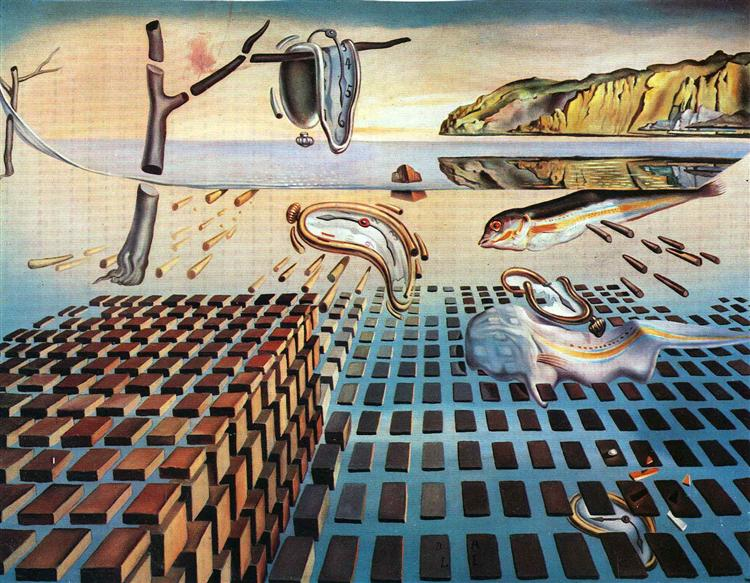

In [48]:
from IPython.display import Image
Image(filename='/content/the-disintegration-of-the-persistence-of-memory.jpg')

In [ ]:
time.sleep(30)

In [50]:
import base64
from vertexai.preview.vision_models import Image

image_path = "/content/the-disintegration-of-the-persistence-of-memory.jpg"

with open(image_path, "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

text1 = f"""Provide a detailed description of this painting which is the the-disintegration-of-the-persistence-of-memory. Focus on the objects representing time:

[Image of {encoded_image}]
"""
response = generate_response(text1)
display_html(response)
